In [1]:
#!/usr/bin/env python3

import pandas as pd

import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/39215202/matplotlib-geopandas-plot-multiple-layers-control-figsize
# https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
# https://erdatadoc.com/2016/07/14/jupyter-notebook-matplotlib-figure-display-options-and-pandas-set_option-optimization-tips/
# plt.rcParams['figure.figsize'] = [10, 20]

# display plots inside jupyter
%matplotlib inline

import geo
import malaria_scraper


# Create map dataframe

In [2]:
df_map = geo.get_map_df()
print(df_map.dtypes)
print(len(df_map))
# 177
# print(df_map.describe)
#df_map.head()

pop_est       float64
continent      object
country        object
iso_a3         object
gdp_md_est    float64
geometry       object
dtype: object
177


# Create country malaria dataframe

In [3]:
df_malaria = malaria_scraper.get_dataframe_all_countries()
print(len(df_malaria))
# 241
df_malaria.tail()

241


,areas_with_malaria,estimated_risk,Unnamed: 0,iso_a3
country,,,,
Virgin Islands,None,none,NaN,VGB
Wake Island,None,none,NaN,NaN
Wallis and Futuna Islands,None,none,NaN,NaN
West Bank,None,none,NaN,NaN
Western Sahara,Rare cases,no data,NaN,NaN


# Merge malaria into GeoDataFrame

In [4]:
df_map = pd.merge(left=df_map, right=df_malaria, how='inner', on='iso_a3', sort=True)

# df_map.iloc[35:40]
# pd.set_option('display.max_rows', 200)
df_map

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,areas_with_malaria,estimated_risk,Unnamed: 0
0,265100.0,Asia,N. Cyprus,-99,3600.0,"POLYGON ((32.73178022637745 35.14002594658844,...",None,none,88.0
1,1804838.0,Europe,Kosovo,-99,5352.0,"POLYGON ((20.76215999999999 42.05186000000003,...",None,none,88.0
2,3500000.0,Africa,Somaliland,-99,12250.0,"POLYGON ((48.93812951029651 9.451748968946674,...",None,none,88.0
3,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AprilâDecember in all areas at altitudes bel...,moderate,0.0
4,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,All,high,1.0
5,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",None,none,2.0
6,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",None,none,3.0
7,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,None,none,4.0
8,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,...",None,none,5.0
9,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...,None,none,6.0


# Add estimated_risk_int for use in chloropleth map

In [5]:
# estimated_risk_int is for plotting color only
# aside from estimated_risk == 'no data', remaining values are ordinal but not interval or ratio
# https://www.mymarketresearchmethods.com/types-of-data-nominal-ordinal-interval-ratio/
df_map['estimated_risk_int'] = df_map['estimated_risk'].map({'no data': -1, 'none': 0, 'very low': 1, 'low': 2, 'moderate': 3, 'high': 4})
#df_map['estimated_risk'].values

# Plot chloropleth map of estimated malaria risk for US travelers
http://geopandas.org/mapping.html

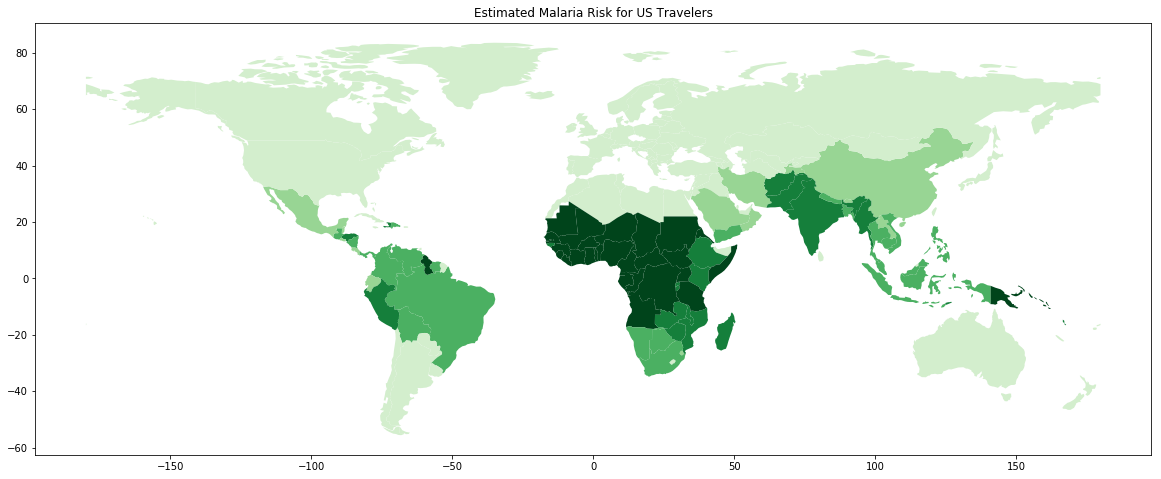

In [6]:
# don't show Antarctica
# cx coordinate based indexing slice by longitude, latitude
df_map = df_map.cx[:, -60:90]

cmap = 'Greens'
num_colors = 6
vmin=-1
vmax=4

# https://stackoverflow.com/questions/39215202/matplotlib-geopandas-plot-multiple-layers-control-figsize
figsize = (20, 20)
fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.set_title('Estimated Malaria Risk for US Travelers')

df_map.plot(column='estimated_risk_int', cmap=cmap, ax=ax, k=num_colors, legend=False, vmin=vmin, vmax=vmax)